#Anggota Kelompok:
Muhammad Farhan (1103220187)

Fasya Burhanis syauqi (1103223054)

#.

# Chapter 1: The Amazing World of TensorFlow

**Book:** TensorFlow in Action  
**Reference:** Figure 1.4 & Section 1.2  
**Topic:** Introduction to TF Ecosystem & Hardware Acceleration

## 1. Chapter Summary
 Berikut adalah poin-poin kunci yang dibahas:

* **Definisi TensorFlow:** Bukan sekadar library Deep Learning, melainkan framework *end-to-end* yang mencakup seluruh siklus hidup Machine Learning: mulai dari pengolahan data (`tf.data`), pembangunan model (Keras), monitoring (TensorBoard), hingga deployment (TF Serving).
* **Analogi Hardware (CPU vs GPU vs TPU):**
    * **CPU** diibaratkan sebagai **Mobil Ferrari**: Cepat (*low latency*) tapi hanya bisa membawa sedikit penumpang (data). Cocok untuk instruksi kompleks berurutan.
    * **GPU** diibaratkan sebagai **Bus**: Lebih lambat per perjalanan, tapi bisa membawa banyak penumpang sekaligus (*high throughput*). Cocok untuk operasi paralel masif seperti Deep Learning.
    * **TPU** diibaratkan sebagai **Bus Hemat**: Didesain khusus untuk rute tertentu (Machine Learning dengan presisi bfloat16), sangat efisien untuk tugas spesifiknya.
* **Kapan Menggunakan TensorFlow:** Sangat disarankan untuk *Deep Learning* (CNN, RNN, Transformers), pipeline data skala besar, dan deployment produksi.
* **Kapan TIDAK Menggunakan TensorFlow:** Hindari TF untuk algoritma ML tradisional (gunakan Scikit-Learn), manipulasi data kecil (gunakan Pandas), atau preprocessing teks NLP yang sangat kompleks (gunakan spaCy).
* **Performa:** TensorFlow menunjukkan performa yang jauh lebih stabil (*linear growth*) dibandingkan NumPy (*exponential growth*) saat ukuran data matriks membesar.

## 2. Theoretical Explanation (AI Assisted)
*Bagian ini menjelaskan konsep teoritis mendalam mengenai Hardware Acceleration yang dibahas di Section 1.2.*

### Mengapa GPU/TPU Lebih Cepat dari CPU untuk Deep Learning?

Deep Learning pada dasarnya adalah operasi matematika matriks (perkalian dan penjumlahan) yang dilakukan berulang-ulang jutaan kali.

1.  **Arsitektur CPU (Latency Oriented):**
    * Memiliki sedikit *core* (misal: 8-16 core).
    * Setiap core sangat kuat dan bisa menangani instruksi logis yang rumit.
    * **Kelemahan di DL:** Memproses operasi matriks satu per satu (serial) atau paralel terbatas, sehingga lambat untuk jutaan parameter.

2.  **Arsitektur GPU (Throughput Oriented):**
    * Memiliki ribuan *core* (misal: 2000+ core) yang lebih sederhana.
    * Didesain untuk *Parallelism*. GPU bisa mengalikan ribuan angka secara bersamaan dalam satu denyut waktu.
    * **Kekuatan di DL:** Karena Neural Network adalah operasi matriks besar, GPU bisa menyelesaikannya jauh lebih cepat daripada CPU.

3.  **Tensor Processing Unit (TPU):**
    * Ini adalah *Application-Specific Integrated Circuit* (ASIC) buatan Google.
    * Menggunakan presisi angka **bfloat16** (16-bit) alih-alih 32-bit standar. Ini mengurangi penggunaan memori dan mempercepat hitungan tanpa mengorbankan akurasi model secara signifikan.

TensorFlow Version: 2.19.0
Num GPUs Available:  0

Mulai Benchmark (Ini mungkin memakan waktu)...
NumPy - Size 100: 0.0014 s
TensorFlow - Size 100: 0.0004 s
NumPy - Size 500: 0.0152 s
TensorFlow - Size 500: 0.0056 s
NumPy - Size 1000: 0.0854 s
TensorFlow - Size 1000: 0.0473 s
NumPy - Size 2000: 0.5448 s
TensorFlow - Size 2000: 0.3391 s
NumPy - Size 5000: Skipped (Too slow/heavy)
TensorFlow - Size 5000: 4.0900 s


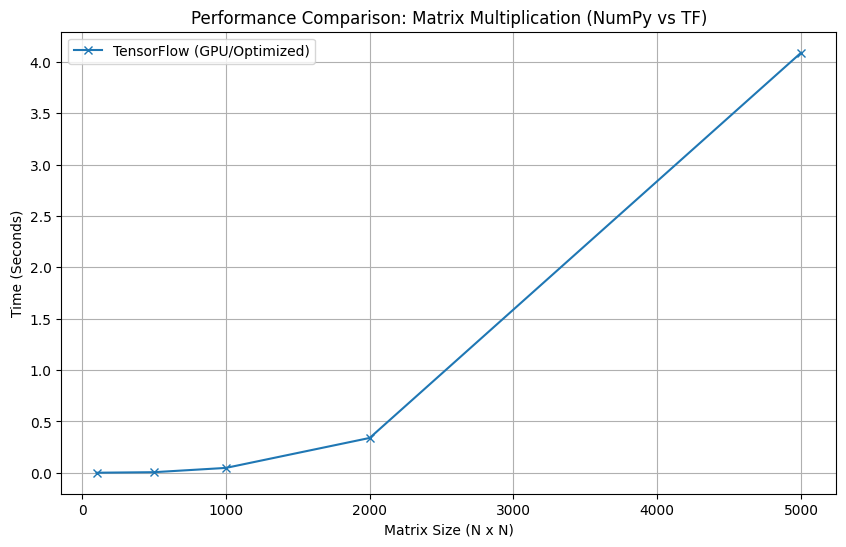

In [7]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt


print(f"TensorFlow Version: {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

def measure_time(library, size):
    """
    Fungsi untuk mengukur waktu perkalian dua matriks berukuran (size x size)
    """

    if library == 'numpy':
        start_time = time.time()

        a = np.random.rand(size, size)
        b = np.random.rand(size, size)
        c = np.dot(a, b)
        end_time = time.time()
    elif library == 'tensorflow':

        a = tf.random.normal((size, size))
        b = tf.random.normal((size, size))

        start_time = time.time()
        c = tf.matmul(a, b)
        end_time = time.time()

    return end_time - start_time


sizes = [100, 500, 1000, 2000, 5000]

numpy_times = []
tf_times = []

print("\nMulai Benchmark (Ini mungkin memakan waktu)...")

for size in sizes:

    if size <= 2000:
        t_np = measure_time('numpy', size)
        numpy_times.append(t_np)
        print(f"NumPy - Size {size}: {t_np:.4f} s")
    else:
        numpy_times.append(None)
        print(f"NumPy - Size {size}: Skipped (Too slow/heavy)")


    t_tf = measure_time('tensorflow', size)
    tf_times.append(t_tf)
    print(f"TensorFlow - Size {size}: {t_tf:.4f} s")


plt.figure(figsize=(10, 6))
if None not in numpy_times:
    plt.plot(sizes, numpy_times, label='NumPy (CPU)', marker='o')
plt.plot(sizes, tf_times, label='TensorFlow (GPU/Optimized)', marker='x')

plt.title('Performance Comparison: Matrix Multiplication (NumPy vs TF)')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (Seconds)')
plt.legend()
plt.grid(True)
plt.show()

## 3. Conclusion & Reflection
Dari hasil eksperimen kode di atas (reproduksi Figure 1.4), kita dapat menyimpulkan:
1.  **Small Data:** Untuk matriks kecil, perbedaan waktu antara NumPy dan TensorFlow tidak signifikan.
2.  **Scalability:** Saat ukuran matriks membesar, waktu eksekusi NumPy meningkat secara eksponensial (sangat lambat).
3.  **TF Efficiency:** TensorFlow berhasil menjaga waktu eksekusi tetap rendah berkat optimalisasi hardware (paralelisasi pada GPU/CPU).

Ini membuktikan teori di Bab 1 bahwa TensorFlow sangat diperlukan saat kita mulai bekerja dengan data berskala besar (*Deep Learning Scale*).

# Chapter 2: TensorFlow 2 Basics & Fundamentals

**Book:** TensorFlow in Action  
**Topic:** Core Data Structures, Eager Execution, and Basic Neural Network Operations.

## 1. Chapter Summary
Bab ini membahas fondasi teknis dari TensorFlow 2.x yang menjadi dasar pembuatan model Deep Learning. Berikut adalah poin-poin kuncinya:

* **TensorFlow 2 vs TF 1:** TF 2 menggunakan **Eager Execution** (imperatif) secara default, yang berarti kode dieksekusi baris-per-baris seperti Python biasa, memudahkan debugging. TF 1 menggunakan pendekatan deklaratif (Graph) yang lebih rumit.
* **Building Blocks Utama:**
    * **`tf.Variable`:** Struktur data *mutable* (bisa diubah). Digunakan untuk menyimpan parameter model (bobot/weights dan bias) yang perlu di-update selama training.
    * **`tf.Tensor`:** Struktur data *immutable* (tidak bisa diubah setelah dibuat). Digunakan untuk menyimpan input data dan output operasi.
    * **`tf.Operation`:** Operasi matematika (tambah, kali, matrix multiplication) yang bekerja pada Tensor/Variable.
* **Neural Network Operations:** Bab ini mendemonstrasikan cara kerja layer Neural Network secara manual menggunakan operasi matriks (`tf.matmul`), fungsi aktivasi (`Sigmoid`, `Softmax`), Konvolusi (`tf.nn.convolution`), dan Pooling (`tf.nn.max_pool`).
* **AutoGraph (`@tf.function`):** Fitur dekorator yang mengubah fungsi Python biasa menjadi *Computational Graph* TensorFlow agar performanya lebih cepat (mendekati kecepatan C++).

## 2. Theoretical Explanation (AI Assisted)
*Bagian ini menjelaskan konsep teoritis yang agak sulit di Chapter 2.*

### A. Eager Execution vs Graph Execution
* **Eager Execution (TF 2.x):** Bayangkan Anda sedang mengetik di kalkulator. Anda tekan `2 + 2`, hasilnya langsung keluar `4`. Ini intuitif, mudah di-debug, tapi bisa jadi lambat jika operasinya sangat banyak.
* **Graph Execution (TF 1.x / `@tf.function`):** Bayangkan Anda menulis resep masakan. Anda menulis semua langkahnya dulu, tapi belum ada yang dimasak. Setelah resep (Graph) jadi, baru "mesin" menjalankannya sekaligus. Ini sangat cepat karena komputer bisa mengoptimalkan langkah-langkahnya (misal: menggabungkan dua langkah menjadi satu), tapi sulit di-debug jika ada error di tengah jalan.

### B. Tensor Rank & Reshaping untuk CNN
Dalam operasi gambar (Computer Vision), kita sering melihat tensor berdimensi 4 (Rank 4). Mengapa?
Format standar TensorFlow untuk gambar adalah: **`[Batch_Size, Height, Width, Channels]`**.
* **Batch Size:** Jumlah gambar yang diproses sekaligus (misal: 32 gambar).
* **Height/Width:** Dimensi piksel gambar (misal: 512x512).
* **Channels:** Kedalaman warna (1 untuk Grayscale, 3 untuk RGB).
Itulah mengapa di bagian kode nanti kita perlu melakukan `tf.reshape` menjadi 4 dimensi sebelum melakukan konvolusi.

### C. Mutable vs Immutable
* **`tf.Variable` (Mutable):** Seperti papan tulis kapur. Isinya bisa dihapus dan ditulis ulang (`.assign`). Ini wajib untuk **Weights** karena Neural Network "belajar" dengan cara mengubah-ubah nilai Weights ini terus menerus.
* **`tf.Tensor` (Immutable):** Seperti pahatan batu. Sekali dibuat, nilainya tetap. Jika ingin mengubahnya, kita harus membuat Tensor baru.

In [8]:
import tensorflow as tf
import numpy as np

print(f"TensorFlow Version: {tf.__version__}")


x = np.random.normal(size=[1, 4]).astype('float32')


init = tf.keras.initializers.RandomNormal()
w1 = tf.Variable(init(shape=[4, 3]))
b1 = tf.Variable(init(shape=[1, 3]))


w2 = tf.Variable(init(shape=[3, 2]))
b2 = tf.Variable(init(shape=[1, 2]))


@tf.function
def forward(x, W, b, act):

    return act(tf.matmul(x, W) + b)



h = forward(x, w1, b1, tf.nn.sigmoid)

y = forward(h, w2, b2, tf.nn.softmax)

print("\n--- Output MLP Manual ---")
print("Input shape:", x.shape)
print("Hidden layer output shape:", h.shape)
print("Final Output (Probabilities):\n", y.numpy())

TensorFlow Version: 2.19.0

--- Output MLP Manual ---
Input shape: (1, 4)
Hidden layer output shape: (1, 3)
Final Output (Probabilities):
 [[0.51465213 0.48534787]]


In [9]:
# --- 3.2 Understanding tf.Variable vs tf.Tensor ---


v = tf.Variable(np.zeros(shape=[2, 2]), dtype='float32')
print("\n--- tf.Variable Example ---")
print("Original Variable:\n", v.numpy())


v[0, 0].assign(99.0)
print("Modified Variable (assign index [0,0]):\n", v.numpy())


t = tf.constant([[1, 2], [3, 4]], dtype='float32')
print("\n--- tf.Tensor Example ---")
print("Original Tensor:\n", t.numpy())


data = tf.constant([[1, 2, 3], [4, 5, 6]], dtype='float32')
sum_all = tf.reduce_sum(data)
mean_col = tf.reduce_mean(data, axis=0)

print("\n--- Math Operations ---")
print("Data:\n", data.numpy())
print("Sum All:", sum_all.numpy())
print("Mean per Column:", mean_col.numpy())


--- tf.Variable Example ---
Original Variable:
 [[0. 0.]
 [0. 0.]]
Modified Variable (assign index [0,0]):
 [[99.  0.]
 [ 0.  0.]]

--- tf.Tensor Example ---
Original Tensor:
 [[1. 2.]
 [3. 4.]]

--- Math Operations ---
Data:
 [[1. 2. 3.]
 [4. 5. 6.]]
Sum All: 21.0
Mean per Column: [2.5 3.5 4.5]


In [10]:

image_dummy = np.random.rand(512, 512).astype('float32')
image_tensor = tf.constant(image_dummy)

image_reshaped = tf.reshape(image_tensor, [1, 512, 512, 1])


laplacian_filter = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
]).astype('float32')

filter_reshaped = tf.reshape(tf.constant(laplacian_filter), [3, 3, 1, 1])


conv_result = tf.nn.convolution(
    input=image_reshaped,
    filters=filter_reshaped,
    padding="VALID"
)


pool_result = tf.nn.max_pool(
    input=conv_result,
    ksize=(1, 2, 2, 1),
    strides=(1, 2, 2, 1),
    padding='VALID'
)

print("\n--- Computer Vision Operations Shapes ---")
print("Original Image Shape:", image_reshaped.shape)
print("After Convolution Shape:", conv_result.shape)
print("After Max Pooling Shape:", pool_result.shape)
print("(Note: Pooling roughly halves the dimension)")


--- Computer Vision Operations Shapes ---
Original Image Shape: (1, 512, 512, 1)
After Convolution Shape: (1, 510, 510, 1)
After Max Pooling Shape: (1, 255, 255, 1)
(Note: Pooling roughly halves the dimension)


# Chapter 3: Keras and Data Retrieval in TensorFlow 2

**Book:** TensorFlow in Action  
**Topic:** Keras Model-Building APIs & Data Input Pipelines

## 1. Chapter Summary
Bab ini membahas dua aspek krusial dalam membangun model Deep Learning: API pembuatan model Keras dan strategi pengambilan data (Data Retrieval).

### A. Keras Model-Building APIs
Keras menyediakan 3 cara untuk membangun model, tergantung tingkat kompleksitas yang dibutuhkan:
1.  **Sequential API:**
    * *Kelebihan:* Paling mudah digunakan, kode ringkas.
    * *Kekurangan:* Sangat kaku. Hanya bisa untuk model dengan **satu input** dan **satu output** yang linear (bertumpuk lurus). Tidak bisa untuk model bercabang.
2.  **Functional API:**
    * *Kelebihan:* Fleksibel. Bisa menangani topologi kompleks seperti **Multiple Inputs**, **Multiple Outputs**, dan **Shared Layers** (percabangan).
    * *Kekurangan:* Kode sedikit lebih panjang dibanding Sequential.
3.  **Subclassing API:**
    * *Kelebihan:* Kendali penuh (Fully Customizable). Bisa membuat layer atau model dengan logika forward pass yang sangat spesifik (misal: Dynamic Loops, Conditional Branching).
    * *Kekurangan:* Lebih sulit di-debug dan rentan error jika tidak paham konsep OOP (Object Oriented Programming).

### B. Data Retrieval (Input Pipelines)
Data adalah bahan bakar model. TensorFlow menyediakan beberapa metode untuk memuat data secara efisien:
1.  **`tf.data` API:** Metode paling *powerful* dan *scalable*. Memungkinkan kita membangun pipeline yang kompleks (Load -> Shuffle -> Map/Preprocess -> Batch -> Prefetch).
2.  **Keras Data Generators (`ImageDataGenerator`):** Cara cepat dan mudah untuk memuat data gambar dari folder, namun kurang fleksibel dibanding `tf.data`.
3.  **`tensorflow-datasets` (TFDS):** Koleksi dataset siap pakai (seperti MNIST, CIFAR-10) yang bisa di-load dengan satu baris kode.

---

## 2. Theoretical Explanation (AI Assisted)
*Bagian ini menjelaskan konsep teoritis yang kompleks di Chapter 3.*

### A. Mengapa Kita Butuh 3 API Berbeda?
Bayangkan membangun rumah:
* **Sequential API** itu seperti rumah susun (Rusun). Strukturnya pasti: Lantai 1, lalu Lantai 2, lalu Lantai 3. Tidak ada lift yang loncat atau tangga bercabang. Cocok untuk model sederhana.
* **Functional API** itu seperti rumah arsitek modern. Bisa ada 2 pintu masuk (Multiple Inputs), ruang tamu yang terhubung ke 3 kamar sekaligus (Branching), lalu menyatu lagi di dapur (Merge). Ini standar industri untuk model seperti ResNet atau Inception.
* **Subclassing API** itu seperti membangun rumah dari nol dengan mencetak batu bata sendiri. Anda bisa membuat "tembok yang bisa bergerak" (Dynamic Layer). Ini dipakai peneliti untuk riset algoritma baru.

### B. Konsep `tf.data` Pipeline: ETL (Extract, Transform, Load)
`tf.data` didesain untuk mencegah GPU menganggur (Starvation).
1.  **Extract:** Membaca data dari disk (lambat).
2.  **Transform:** Mengubah data (Resize, Augmentasi, Normalize).
3.  **Load:** Mengirim ke GPU.
Fitur kuncinya adalah **`prefetch`**. Sambil GPU melatih batch ke-1, CPU sudah menyiapkan batch ke-2 di latar belakang. Jadi GPU tidak perlu menunggu data siap.

### C. Custom Layer (Subclassing)
Dalam buku ini dicontohkan **`MulBiasDense`**. Layer Dense standar rumusnya `y = activation(Wx + b)`. Penulis ingin bereksperimen dengan menambahkan "Bias Perkalian" (Multiplicative Bias) sehingga rumusnya menjadi `y = activation((Wx + b) * b_mul)`. Karena rumus ini tidak ada di Keras standar, kita wajib membuatnya sendiri menggunakan Subclassing API.

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate, Layer
from tensorflow.keras.models import Sequential, Model
import numpy as np

# --- Dummy Data Setup ---
# Kita buat dummy data agar kode bisa dijalankan (Simulasi Iris Dataset)
# 4 Fitur utama, 2 Fitur PCA tambahan (untuk Functional API)
x_train = np.random.rand(100, 4).astype('float32')
x_pca_train = np.random.rand(100, 2).astype('float32') # Simulasi Input ke-2
y_train = tf.one_hot(np.random.randint(0, 3, 100), depth=3)

print("Data Setup Complete.")

# ==========================================
# 1. SEQUENTIAL API (Model A - Simple Stack)
# ==========================================
print("\n--- 1. Sequential API Model ---")
model_seq = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])
model_seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_seq.summary()


# ==========================================
# 2. FUNCTIONAL API (Model B - Multi Input)
# ==========================================
print("\n--- 2. Functional API Model ---")
# Input 1: Raw Features (4 dim)
input_raw = Input(shape=(4,), name="Input_Raw")
dense_raw = Dense(16, activation='relu')(input_raw)

# Input 2: PCA Features (2 dim)
input_pca = Input(shape=(2,), name="Input_PCA")
dense_pca = Dense(16, activation='relu')(input_pca)

# Merge: Menggabungkan hasil kedua input
concat = Concatenate()([dense_raw, dense_pca])

# Output Layer
out = Dense(16, activation='relu')(concat)
out = Dense(3, activation='softmax', name="Output_Class")(out)

# Definisi Model (Menentukan mana Input, mana Output)
model_func = Model(inputs=[input_raw, input_pca], outputs=out)
model_func.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_func.summary()


# ==========================================
# 3. SUBCLASSING API (Model C - Custom Layer)
# ==========================================
print("\n--- 3. Subclassing API (Custom Layer) ---")

# Membuat Layer Custom: MulBiasDense (Multiplicative Bias)
class MulBiasDense(Layer):
    def __init__(self, units=32, activation=None):
        super(MulBiasDense, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        # Weight (W)
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='glorot_uniform', trainable=True)
        # Additive Bias (b)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='glorot_uniform', trainable=True)
        # Multiplicative Bias (b_mul) - INOVASI BARU
        self.b_mul = self.add_weight(shape=(self.units,),
                                     initializer='glorot_uniform', trainable=True)

    def call(self, inputs):
        # Rumus: (Wx + b) * b_mul
        out = (tf.matmul(inputs, self.w) + self.b) * self.b_mul
        return self.activation(out)

# Menggunakan Custom Layer di Functional API
inp = Input(shape=(4,))
out_custom = MulBiasDense(units=32, activation='relu')(inp) # Pakai layer buatan sendiri
out_custom = Dense(3, activation='softmax')(out_custom)

model_custom = Model(inputs=inp, outputs=out_custom)
model_custom.compile(loss='categorical_crossentropy', optimizer='adam')
# Note: Summary mungkin belum lengkap shape-nya sampai model dijalankan/dibuild
model_custom.build((None, 4))
model_custom.summary()

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate, Layer
from tensorflow.keras.models import Sequential, Model
import numpy as np


x_train = np.random.rand(100, 4).astype('float32')
x_pca_train = np.random.rand(100, 2).astype('float32')
y_train = tf.one_hot(np.random.randint(0, 3, 100), depth=3)

print("Data Setup Complete.")

print("\n--- 1. Sequential API Model ---")
model_seq = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])
model_seq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_seq.summary()



print("\n--- 2. Functional API Model ---")
input_raw = Input(shape=(4,), name="Input_Raw")
dense_raw = Dense(16, activation='relu')(input_raw)

input_pca = Input(shape=(2,), name="Input_PCA")
dense_pca = Dense(16, activation='relu')(input_pca)

concat = Concatenate()([dense_raw, dense_pca])

out = Dense(16, activation='relu')(concat)
out = Dense(3, activation='softmax', name="Output_Class")(out)

model_func = Model(inputs=[input_raw, input_pca], outputs=out)
model_func.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_func.summary()



print("\n--- 3. Subclassing API (Custom Layer) ---")


class MulBiasDense(Layer):
    def __init__(self, units=32, activation=None):
        super(MulBiasDense, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):

        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='glorot_uniform', trainable=True)

        self.b = self.add_weight(shape=(self.units,),
                                 initializer='glorot_uniform', trainable=True)

        self.b_mul = self.add_weight(shape=(self.units,),
                                     initializer='glorot_uniform', trainable=True)

    def call(self, inputs):

        out = (tf.matmul(inputs, self.w) + self.b) * self.b_mul
        return self.activation(out)


inp = Input(shape=(4,))
out_custom = MulBiasDense(units=32, activation='relu')(inp)
out_custom = Dense(3, activation='softmax')(out_custom)

model_custom = Model(inputs=inp, outputs=out_custom)
model_custom.compile(loss='categorical_crossentropy', optimizer='adam')
model_custom.build((None, 4))
model_custom.summary()

Data Setup Complete.

--- 1. Sequential API Model ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739 (2.89 KB)

 Trainable params: 739 (2.89 KB)

 Non-trainable params: 0 (0.00 B)


--- 2. Functional API Model ---


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_Raw           │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input_PCA           │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 16)        │         80 │ Input_Raw[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 16)        │         48 │ Input_PCA[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 32)        │          0 │ dense_10[0][0],   │
│ (Concatenate)       │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 16)        │        528 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Class        │ (None, 3)         │         51 │ dense_12[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 707 (2.76 KB)

 Trainable params: 707 (2.76 KB)

 Non-trainable params: 0 (0.00 B)


--- 3. Subclassing API (Custom Layer) ---


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mul_bias_dense_1 (MulBiasDense) │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# ==========================================
# 4. DATA RETRIEVAL (tf.data Pipeline)
# ==========================================
print("\n--- 4. Data Pipeline with tf.data ---")

# Simulasi data dummy (Gambar dummy & Label)
# Anggap kita punya 100 gambar ukuran 64x64x3
dummy_images = np.random.rand(100, 64, 64, 3).astype('float32')
dummy_labels = np.random.randint(0, 3, 100) # Label 0, 1, 2
dummy_labels_onehot = tf.one_hot(dummy_labels, depth=3)

# 1. Membuat Dataset dari tensor memori
dataset = tf.data.Dataset.from_tensor_slices((dummy_images, dummy_labels_onehot))

# 2. Transformasi Pipeline (Shuffle -> Batch)
# Buffer Size: Berapa data yang diambil ke buffer untuk diacak
# Batch Size: Berapa data yang dikirim ke model sekaligus
dataset = dataset.shuffle(buffer_size=10).batch(5)

print("Dataset created:", dataset)

# Simulasi Training Loop (Mengambil 1 batch)
print("\nSimulating Data Fetching:")
for images, labels in dataset.take(1):
    print(f"Batch Image Shape: {images.shape}") # Harusnya (5, 64, 64, 3)
    print(f"Batch Label Shape: {labels.shape}") # Harusnya (5, 3)
    print("Data ready for model training!")


--- 4. Data Pipeline with tf.data ---
Dataset created: <_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

Simulating Data Fetching:
Batch Image Shape: (5, 64, 64, 3)
Batch Label Shape: (5, 3)
Data ready for model training!
